# Aticha Amie Prasongsukarn

# Analysis Pipeline
1. Load Data
    * Download file from kaggle.
    * Read csv.file into notebook. 
1. Clean Data
    * Remove columns not being used depending on the research question
    * Remove missing values
1. Process Data
    * Create any new columns needed that are combinations or aggregates of other columns eg. weighted averages.
1. Wrangle Data
    * Merge the datasets together depending on the goal of the research question.
    * Rename/organize columns to make the resulting dataframe clearer
1. Exploratory Data Analysis
    * Create plots to summarize findings
    * Edit the plot components to make it easier to understand
    * Use color to emphasize different components depending on the research question
    

## Research question/interests
**What are the average healthcare costs for different age groups?**
For this question, I plan to calculate the average healthcare cost for each age group and produce a graph where the x-axis is the age group and the y-axis is the amount. The graph will be plotted as a bar chart for each age group side by side. In addition, I also created a regression plot to show the correlation between medical charges and age group.

**How does the number of children affect medical charges?**
I plan to create a joint plot for this question where the axes are number of children against charges. I hope the joint plot will give an output to show the correlation between number of children and medical charges. I decided to use a joint grid and created a KDE plot for the main graph and added histograms on the marginal plots to explain the plot further.

# Data processing

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions1
else:
    import sys
    sys.path.append("./code")
    import project_functions1

In [5]:
df = project_functions1.load_and_process_age("../data/raw/medical_expense.csv")
df1 = project_functions1.clean_and_wrangle_agecost(df)

In [6]:
df.to_csv('../data/processed/Amiemaindf.csv')
df1.to_csv('../data/processed/Amierq1df.csv')

In [9]:
bmidf = project_functions1.load_and_process_agebmi("../data/raw/medical_expense.csv")
bmidf = project_functions1.clean_and_wrangle_agebmi(bmidf)

In [11]:
costbmidf = project_functions1.load_and_process_agebmi("../data/raw/medical_expense.csv")
costbmidf = project_functions1.clean_and_wrangle_bmi(costbmidf)

In [13]:
bmidf.to_csv('../data/processed/Amiesubrq1.csv')
costbmidf.to_csv('../data/processed/Amiesubrq1cost.csv')

For this section, it mainly focuses on import statements and wrangling data. This section contains import statements required for seaborn plots. In addition, it also imports functions written in a different file that makes it easier to create dataframes without writing many lines. These are functions such as load_and_process function where it takes in the pathname and creates a dataframe according to the columns required for each research questions. In addition, this section converts the processed dataframes and saves it as a csv file so that it can be used to create a dashboard on Tableau for milestone 5.

# Exploratory Data Analysis

This section is organized based on research question. In other words, each analysis or plots are based on the main research question.

## Research Question 1: What are the average healthcare costs for different age groups?

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Average cost')]

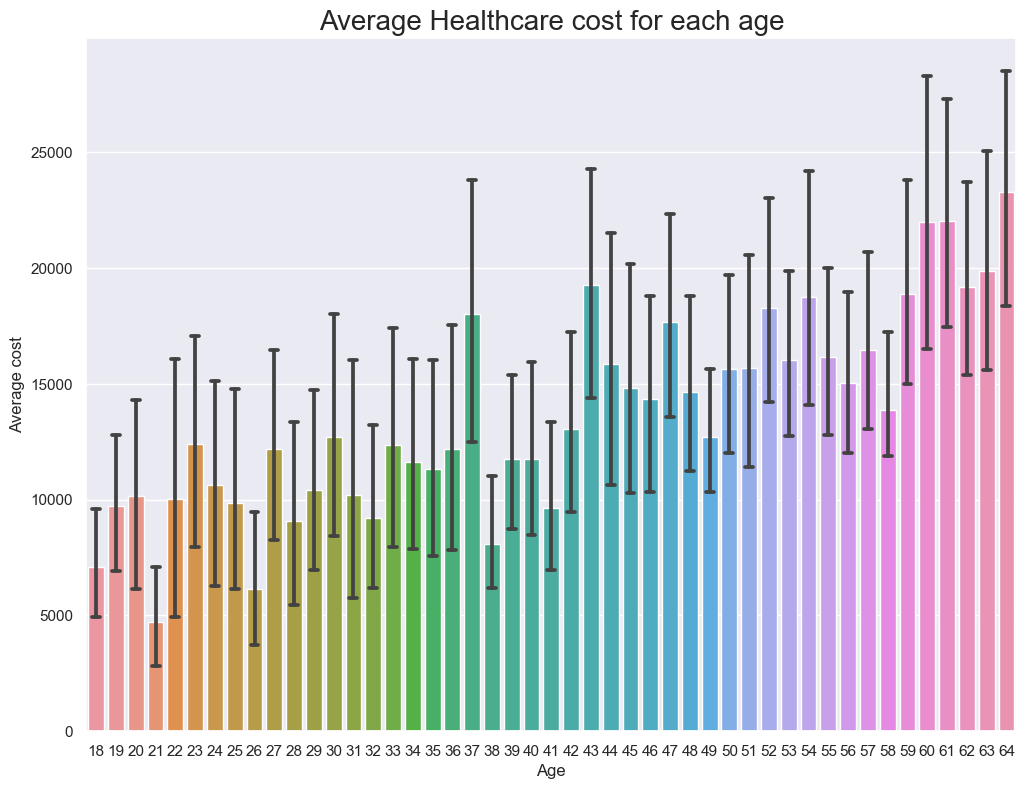

In [46]:
plt = sns.set(rc={'figure.figsize':(12,9)})
plt = sns.barplot(x = 'age', y = 'charges', data = df, errorbar=('ci'), capsize=.4)
plt.set_title("Average Healthcare cost for each age", size = 20)
plt.set(xlabel='Age', ylabel='Average cost')

Since this is a barplot it is hard to see the trend between age group and average healthcare cost. However, by eye, we can see an overall positive trend if we compare the peaks of the barcharts for all ages. But the bar plot is useful as we are able to see some bars where the average cost increases a lot or decreases a lot. For example, from age 37 to age 38, the average cost drops by nearly $10,000. However, because we aren't able to look into the sample for age 37, we don't know why the average medical cost for that group is so high.

Text(0.5, 1.0, 'Average Healthcare cost for each age')

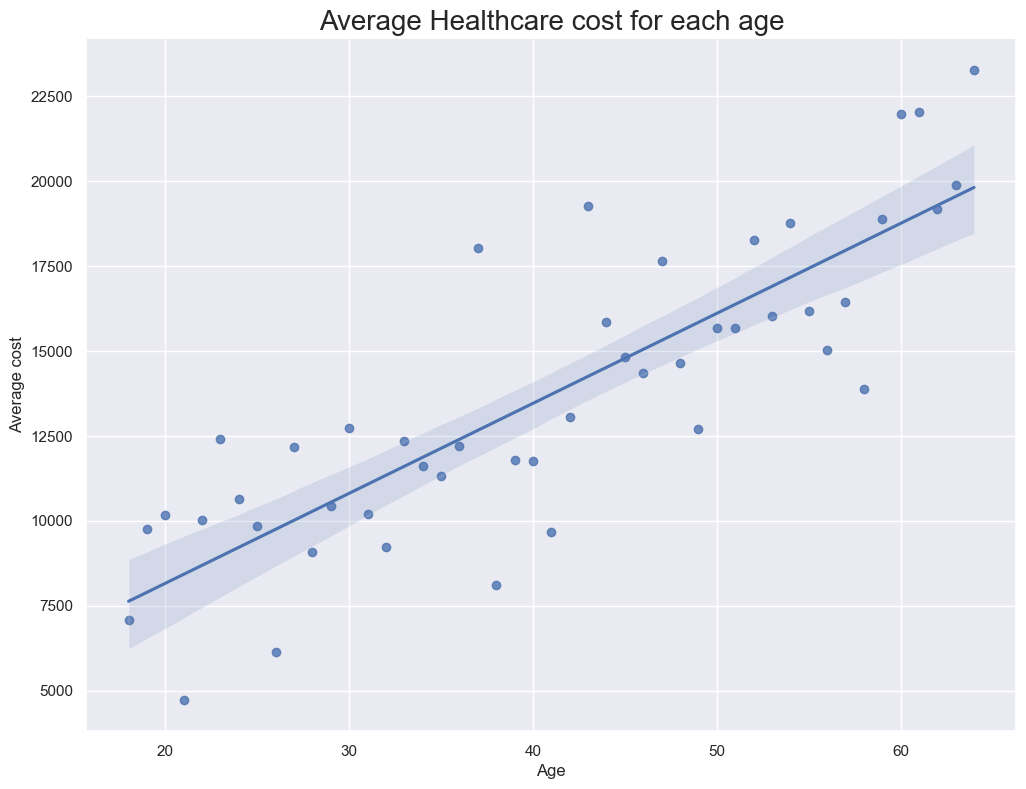

In [38]:
sns.set(rc={'figure.figsize':(12,9)})
plt2 = sns.regplot(x = 'Age', y = 'Average cost', data = df1, ci = 95)
plt2.set_title("Average Healthcare cost for each age", size = 20)

From the plot above, we can see a positive correlation between age and average cost. Though we can see that the points are quite spread out and so creating a weak positive correlation between both factors. As predicted, as we get older, it is possible for the average cost to get higher because older people are prone to more diseases.

#### SubQ: How does age correlate to bmi?

Text(0.5, 1.0, 'Average Bmi for each age')

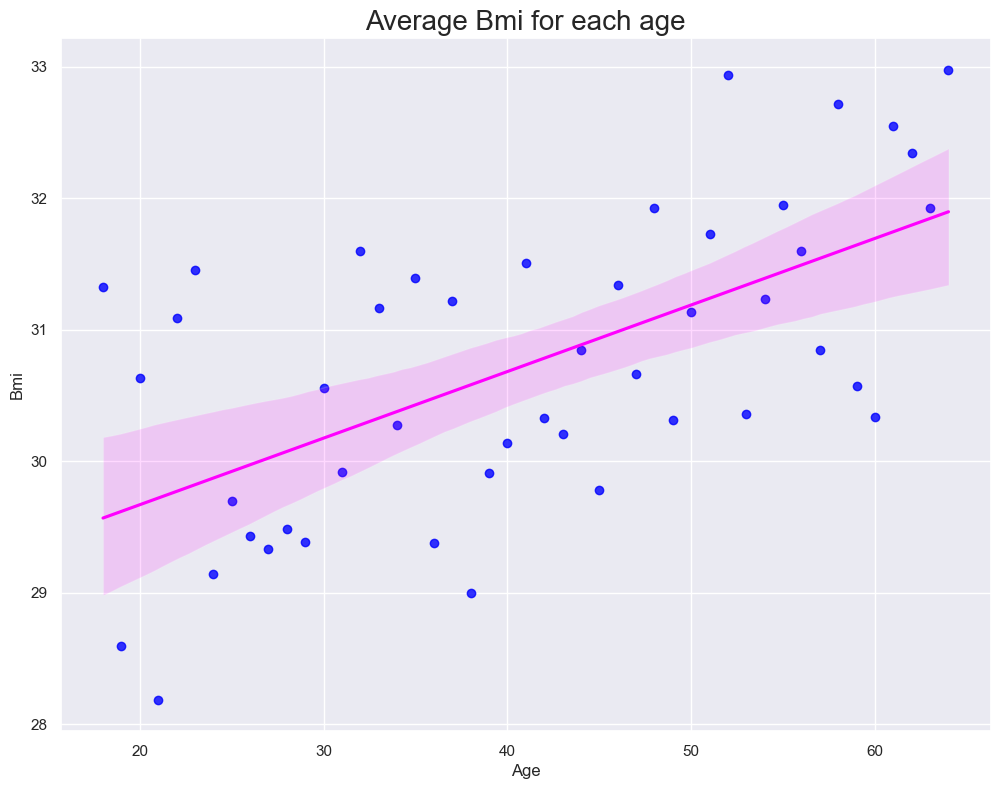

In [39]:
sns.set(rc={'figure.figsize':(12,9)})
plt3 = sns.regplot(x = 'Age', y = 'Bmi', data = bmidf, scatter_kws={"color": "blue"}, line_kws={"color": "magenta"})
plt3.set_title("Average Bmi for each age", size = 20)

From the main plots created for the research question, I decided to create a sub-question to explore the data further and find the correlation between age and bmi. I used a regression plot to show the correlation and from the plot above, the data is more spreadout than the main regression plot of age and healthcare. The trendline created does show a positive correlation between bmi and age but since the points are so spread out, the correlation is very weak. Therefore, in general, we can say that as we increase in age, our bmi tends to be higher.

#### SubQ: How does bmi relate to average medical costs?

Text(0.5, 1, 'Bmi vs medical charges')

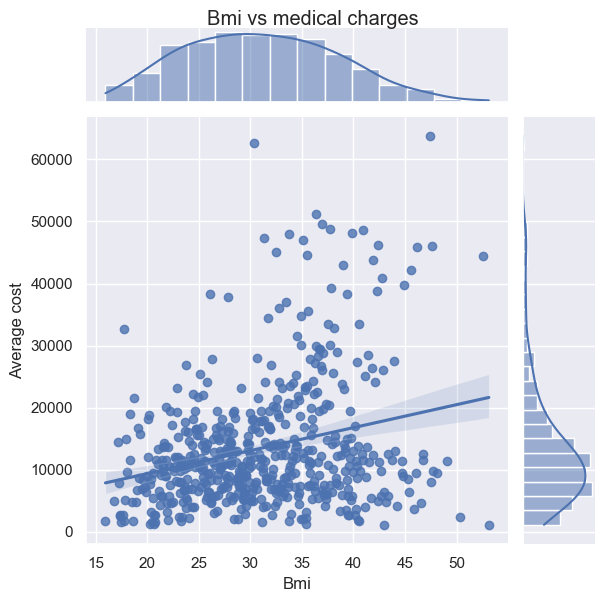

In [40]:
plt4 = sns.set(rc={'figure.figsize':(12,9)})
plt4 = sns.jointplot(x='Bmi', y='Average cost', data=costbmidf, kind='reg')
plt4.fig.suptitle("Bmi vs medical charges", y = 1)

From the sub-question above, I decided to see if bmi relates to the average medical costs and if it is a strong factor or not. From the jointplot created, there is a weak positive trend line created showing a positive correlation between bmi and the average healthcare cost. However, as seen from the points, the data is very spreadout making it seem like bmi is not a strong factor towards average healthcare cost.

## Research Question 2: How does the number of children affect medical charges?

Text(0.5, 1, 'Number of Children vs medical charges')

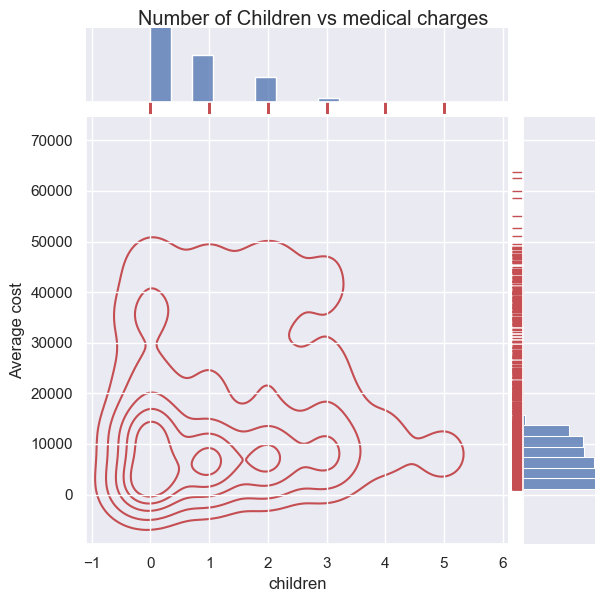

In [41]:
plt5 = sns.JointGrid(data=df, x="children", y="charges")
plt5.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plt5.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
plt5.plot_marginals(sns.histplot)
plt5.ax_joint.set_ylabel("Average cost")
plt5.fig.suptitle("Number of Children vs medical charges", y = 1)

From the plot we can see that the data are scrumbled so close together around 10,000 for charges and it is for people with no children. This may be different to our predicition as we would think families with more children will have higher medical charges. However, from this plot the data is showing the opposite because we can see that families with 5 children has an average medical cost all around 10,000 whilst some families with less children has higher costs that goes up to 50000.

#### SubQ: What is the average number of children for each age group?

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Average number of childeren')]

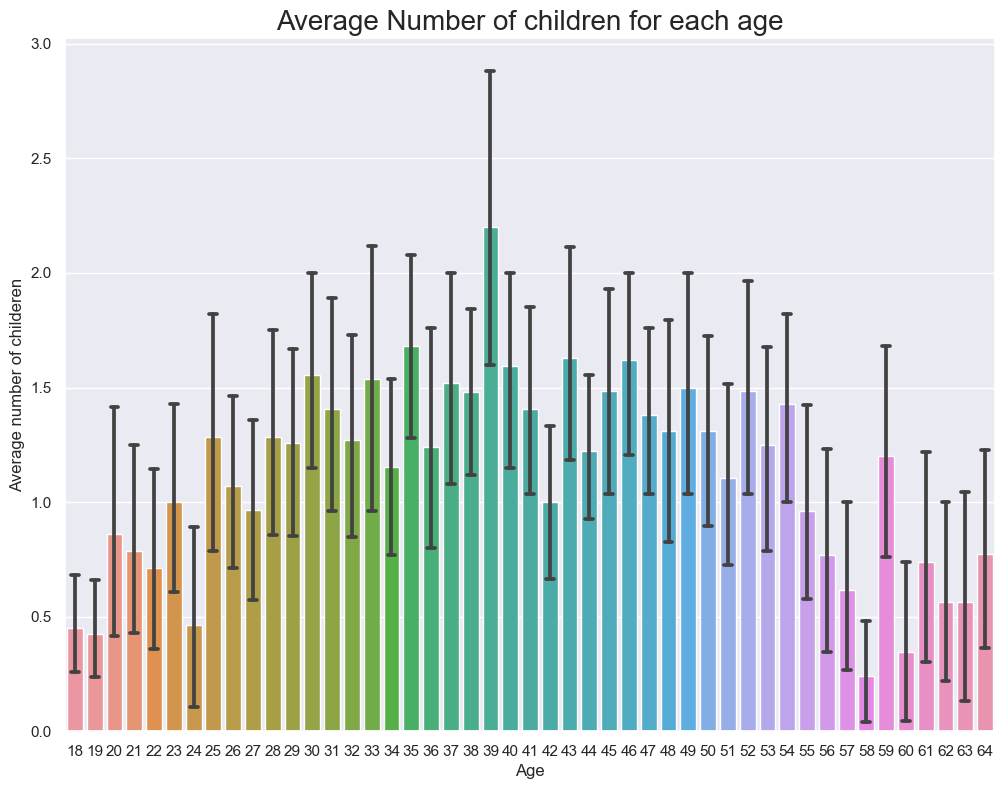

In [48]:
sns.set(rc={'figure.figsize':(12,9)})
plt6 = sns.barplot(x = 'age', y = 'children', data = df, errorbar=('ci'), capsize=.4)
plt6.set_title("Average Number of children for each age", size = 20)
plt6.set(xlabel='Age', ylabel='Average number of childeren')

I decided to create a sub-question to explore the data further by seeing the correlation between the average number of children per age group. From the bar plot above, we can see an overall trend where the peaks of the bars create a parabolic outline which is something we can expect since it is normal for people between age 25 - 53 to have more number of childrens compared to people under 25 or over 53. 

# Conclusion
Overall, it is clear from my research questions that the factors I decided to explore are age, bmi and number of children. From the plots created throughout, we can see that in general age is the strongest underlying factor for high healthcare charges followed by bmi then by number of children. In addition, the findings found for age and bmi seems to be similar to what we predicted or expected. Whilst for the number of children factor, it doesn't seem like the findings are similar to what we predicted.

## Export plots to png files

In [50]:
plt.figure.savefig('../images/Amierq1barplot.png')
plt2.figure.savefig('../images/Amierq1regplot.png')
plt3.figure.savefig('../images/Amiesubq1rq1.png')
plt4.figure.savefig('../images/Amiesubq2rq2.png')
plt5.figure.savefig('../images/Amierq2jointgrid.png')
plt6.figure.savefig('../images/Amiesubq1rq2.png')